# Oversampling method approach

In [1]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter


%matplotlib inline

data = pd.read_csv('/Users/abhiishekchugh/Documents/GitHub/CANN-for-Fraud-Detection/Automobile Insurance/data/pre-processing done/Pre-Processed-Hermet_Encoding.csv')
# data = pd.read_csv("/Users/abhiishekchugh/Documents/GitHub/CANN-for-Fraud-Detection/Automobile Insurance/data/pre-processing done/Pre-Processed-Encoded_Chugh_Baseline_Label_Encoding.csv")
# data = pd.read_csv('/Users/abhiishekchugh/Documents/GitHub/CANN-for-Fraud-Detection/Automobile Insurance/data/pre-processing done/Pre-Processed_OneHotEncoding.csv')
# data = pd.read_csv('/Users/abhiishekchugh/Documents/GitHub/CANN-for-Fraud-Detection/Automobile Insurance/data/pre-processing done/Pre-Processed-Encoded_Chugh_LOOE_FOR_ALL.csv')
#data = pd.read_csv('/Users/abhiishekchugh/Documents/GitHub/CANN-for-Fraud-Detection/Automobile Insurance/data/pre-processing done/Pre-Processed-Encoded_Chugh_WOE_FOR_ALL.csv')
# data = pd.read_csv('/Users/abhiishekchugh/Documents/GitHub/CANN-for-Fraud-Detection/Automobile Insurance/data/pre-processing done/Pre-Processed-Encoded_Chugh.csv')


Shape of X: (15420, 74)
Shape of y: (15420, 1)


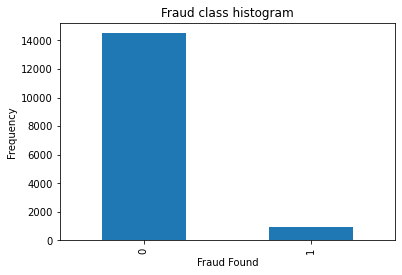

In [2]:
#plotting number of Fraud and non-Fraud
pd.value_counts(data['FraudFound']).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('Fraud Found')
plt.ylabel('Frequency')
data['FraudFound'].value_counts()

X = np.array(data.iloc[:, data.columns != 'FraudFound'])
y = np.array(data.iloc[:, data.columns == 'FraudFound'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Number policies X_train dataset: ", X_train.shape)
print("Number policies  y_train dataset: ", y_train.shape)
print("Number policies  X_test dataset: ", X_test.shape)
print("Number policies  y_test dataset: ", y_test.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
# data.columns.size

Number policies X_train dataset:  (10794, 74)
Number policies  y_train dataset:  (10794, 1)
Number policies  X_test dataset:  (4626, 74)
Number policies  y_test dataset:  (4626, 1)
Before OverSampling, counts of label '1': [638]
Before OverSampling, counts of label '0': [10156] 



## Plotting the data before using SMOTE

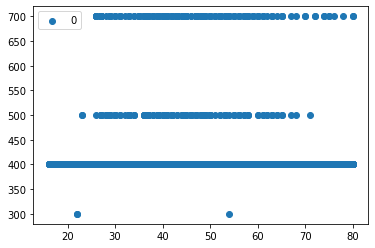

In [4]:
y_train = pd.DataFrame(y_train)
counter = Counter(y_train)

# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = np.where(y_train == label)[0]
    plt.scatter(X_train[row_ix, 0], X_train[row_ix, 1], label=str(label))
plt.legend()
plt.show()

y_train = np.array(y_train)

## SMOTE Step

In [5]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

## Plotting the Oversampled data using SMOTE

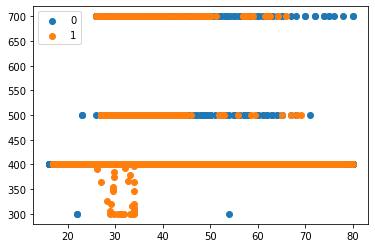

In [6]:
counter = Counter(y_train_res)

# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = np.where(y_train_res == label)[0]
    plt.scatter(X_train_res[row_ix, 0], X_train_res[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [7]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (20312, 74)
After OverSampling, the shape of train_y: (20312,) 

After OverSampling, counts of label '1': 10156
After OverSampling, counts of label '0': 10156


# Functions to create DecisionTreeClassifier

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 42,max_depth=5, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini
      
# Function to perform training with entropy.
def train_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 42,
            max_depth = 5, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

# Function to make predictions
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    #print("Predicted values:")
    #print(y_pred)
    return y_pred

# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: \n",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))

# Training using entropy

In [9]:
dt_entropy = train_using_entropy(X_train_res, X_test, y_train_res)

In [10]:
# Predicting the Test set results
y_pred_train = prediction(X_train_res,dt_entropy)
cal_accuracy(y_train_res, y_pred_train)
y_pred = prediction(X_test,dt_entropy)
cal_accuracy(y_test, y_pred)

Confusion Matrix: 
 [[7095 3061]
 [ 805 9351]]
Accuracy :  80.96691610870421
Report :                precision    recall  f1-score   support

           0       0.90      0.70      0.79     10156
           1       0.75      0.92      0.83     10156

    accuracy                           0.81     20312
   macro avg       0.83      0.81      0.81     20312
weighted avg       0.83      0.81      0.81     20312

Confusion Matrix: 
 [[3046 1295]
 [  92  193]]
Accuracy :  70.01729355814959
Report :                precision    recall  f1-score   support

           0       0.97      0.70      0.81      4341
           1       0.13      0.68      0.22       285

    accuracy                           0.70      4626
   macro avg       0.55      0.69      0.52      4626
weighted avg       0.92      0.70      0.78      4626



# Training using Gini

In [11]:
dt_gini = train_using_gini(X_train_res, X_test, y_train_res)

In [12]:
# Predicting the Test set results
y_pred_train = prediction(X_train_res,dt_gini)
cal_accuracy(y_train_res,y_pred_train)
y_pred = prediction(X_test,dt_gini)
cal_accuracy(y_test, y_pred)

Confusion Matrix: 
 [[7257 2899]
 [ 760 9396]]
Accuracy :  81.98601811736904
Report :                precision    recall  f1-score   support

           0       0.91      0.71      0.80     10156
           1       0.76      0.93      0.84     10156

    accuracy                           0.82     20312
   macro avg       0.83      0.82      0.82     20312
weighted avg       0.83      0.82      0.82     20312

Confusion Matrix: 
 [[3120 1221]
 [  98  187]]
Accuracy :  71.48724600086467
Report :                precision    recall  f1-score   support

           0       0.97      0.72      0.83      4341
           1       0.13      0.66      0.22       285

    accuracy                           0.71      4626
   macro avg       0.55      0.69      0.52      4626
weighted avg       0.92      0.71      0.79      4626



## Confusion matrix plotting function

In [13]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the train dataset: 92.51673887357228%
Precision metric in the train dataset: 90.52014469252838%


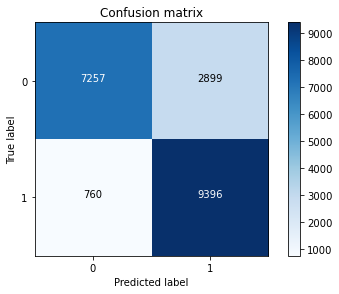

In [14]:
cnf_matrix_tra = confusion_matrix(y_train_res, y_pred_train)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))
print("Precision metric in the train dataset: {}%".format(100*cnf_matrix_tra[0,0]/(cnf_matrix_tra[0,0]+cnf_matrix_tra[1,0])))



class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

Recall metric in the testing dataset: 65.6140350877193%
Precision metric in the testing dataset: 96.95463020509634%


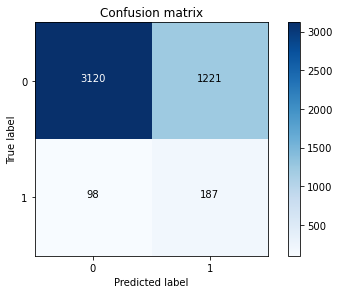

In [15]:

cnf_matrix = confusion_matrix(y_test, y_pred)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()